# Tidy neural data example use
The following notebook demonstrates an example use case for the `mindscope_utilities.ophys.tidy_cell_df` function.  

This function is designed to convert the neural data from an AllenSDK BehaviorOphysExperiment object into tidy format. This facilitates combining data from multiple experiments, given that the timestamps need not be consistent across all cells.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

import allensdk.brain_observatory.behavior.behavior_project_cache as bpc
from mindscope_utilities import event_triggered_response
from mindscope_utilities import ophys

# Get an experiment
## First load the Allen Visual Behavior cache

In [4]:
data_storage_directory = "temp" # Note: this path must exist on your local drive
cache = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

## Then load a specific experiment

In [5]:
ophys_experiment_id = 993619364
experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

behavior_ophys_experiment_993619364.nwb: 100%|██████████| 330M/330M [00:25<00:00, 13.1MMB/s]    


## Now build a tidy dataframe of neural responses
This gives columns for deltaF/F (`dff`), extracted events (`events`), and extracted events after convolution with a half-gaussian filter (`filtered_events`)

In [6]:
tidy_data = ophys.build_tidy_cell_df(experiment)

## View the structure of the resulting dataframe

In [7]:
tidy_data

,timestamps,cell_roi_id,cell_specimen_id,dff,events,filtered_events
0,8.62960,1080653389,1086539735,0.206416,0.0,0.0
1,8.72280,1080653389,1086539735,0.290760,0.0,0.0
2,8.81601,1080653389,1086539735,0.364915,0.0,0.0
3,8.90921,1080653389,1086539735,0.013018,0.0,0.0
4,9.00242,1080653389,1086539735,0.273925,0.0,0.0
...,...,...,...,...,...,...
48347,4515.95622,1080653507,1086519427,0.009673,0.0,0.0
48348,4516.04945,1080653507,1086519427,0.215211,0.0,0.0
48349,4516.14268,1080653507,1086519427,0.133815,0.0,0.0
48350,4516.23591,1080653507,1086519427,0.282727,0.0,0.0


## View the unique cell IDs
This experiment has 64 unique cells

In [8]:
tidy_data['cell_roi_id'].unique()

array([1080653389, 1080653390, 1080653391, 1080653392, 1080653393,
       1080653397, 1080653399, 1080653401, 1080653402, 1080653403,
       1080653404, 1080653406, 1080653409, 1080653412, 1080653414,
       1080653416, 1080653418, 1080653419, 1080653420, 1080653421,
       1080653422, 1080653424, 1080653425, 1080653426, 1080653431,
       1080653433, 1080653434, 1080653435, 1080653436, 1080653441,
       1080653442, 1080653446, 1080653448, 1080653449, 1080653450,
       1080653451, 1080653453, 1080653456, 1080653457, 1080653458,
       1080653459, 1080653460, 1080653461, 1080653462, 1080653463,
       1080653464, 1080653465, 1080653467, 1080653468, 1080653469,
       1080653470, 1080653476, 1080653481, 1080653483, 1080653484,
       1080653487, 1080653489, 1080653491, 1080653492, 1080653495,
       1080653497, 1080653501, 1080653506, 1080653507])

In [9]:
len(tidy_data['cell_roi_id'].unique())

64

## Make a plot of one cell's DeltaF/F response over time

<AxesSubplot:xlabel='timestamps'>

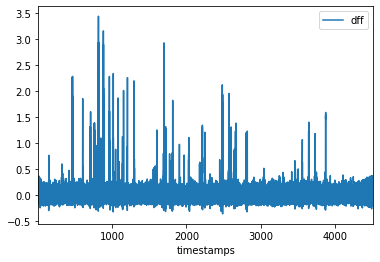

In [10]:
data_to_plot = tidy_data.query('cell_roi_id == {}'.format(tidy_data['cell_roi_id'].unique()[1]))
data_to_plot.plot(
    x = 'timestamps',
    y = 'dff'
)